In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

import h5py


from scipy.optimize import curve_fit



processedDataDir = "../data/processed/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dynamical correlators

## Critical line
# Critical line

We want to see some scaling. From Hohenberg and Halperin, the dynamical scaling for the response function is
$$
\rho(\omega,\vec{k}) = \rho(\vec{k}) Y\left(\frac{\omega}{\Omega_0}\xi^z,k\xi,\frac{K_0}{|h_\psi|^{1/\beta\delta}}\Delta T\right)
$$
with $\xi$ the correlation length. At $\vec{k}=0, \Delta T =0$, it reduces to 
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}\xi^z\right) \ .
$$
In terms of $h$, we have $\xi=h^{-\nu_c}$ and we thus expect
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}h^{-\nu_c z}\right) \ .
$$
From Derek's notebook (and paper by Engels), $\nu_c = 0.402432$ and we expect $z\approx 1.5$, giving

In [21]:
nuc = 0.402432
z = 1.5
-nuc * z

def rescaling(h, href):
    return (h/href)**(-nuc * z)

In [11]:
data=dict()
data["h0002"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h002000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
data["h0004"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h004000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
data["h0006"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h006000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
data["h001"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h010000_c00500.h5",thTime=1000,dt=0.8, data_format="new")

hkeys = ["h0002", "h0004", "h0006", "h001"]

hs = dict()
hs["h0002"] = 0.002
hs["h0004"] = 0.004
hs["h0006"] = 0.006
hs["h001"] = 0.01

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/co

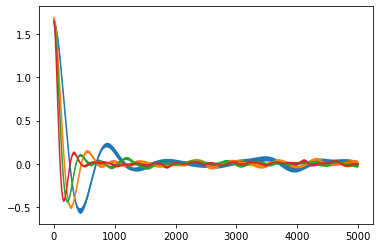

In [12]:
for h in hkeys[:]:
    data[h].load("OtOttp","A", direc=processedDataDir)
    data[h].load("OtOttpFourier","A", direc=processedDataDir)
    plotter.plot(data[h],"OtOttp","A")
plt.show()

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/co

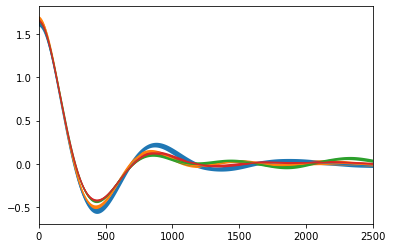

In [22]:
for k in hkeys[:]:
    plotter.plot(data[k],"OtOttp","A", xfact= 1.0 / rescaling(hs[k],0.002))
plt.xlim([0,2500])

plt.show()

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/co

(0.0, 0.03)

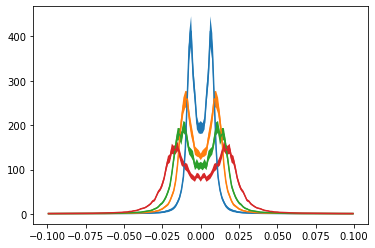

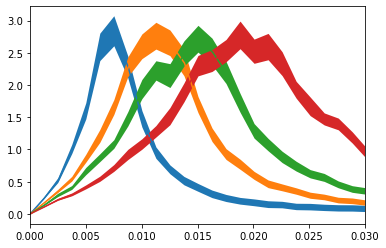

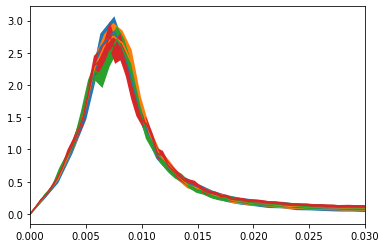

In [24]:
plt.figure(1)
for k in hkeys[:]:
    plotter.plot(data[k],"OtOttpFourier","A")
plt.figure(2)

for k in hkeys[:]:
    plotter.plot(data[k],"OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"]))
   # plt.errorbar(data[k].OtOttpFourier_oms["A"], np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].mean, np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].err)
plt.xlim([0,0.03])


plt.figure(3)
for k in hkeys[:]:
    plotter.plot(data[k],"OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"]))

plt.xlim([0,0.03])

# Pseudocritical point

In [2]:
datazps = ConfResults(fn="../data/zpseudocritical_N080_m-0470052_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


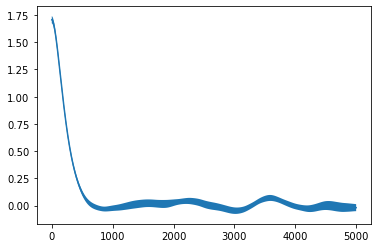

In [3]:
datazps.load("OtOttp","A", direc=processedDataDir)
datazps.load("OtOttpFourier","A", direc=processedDataDir)
plotter.plot(datazps,"OtOttp","A")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


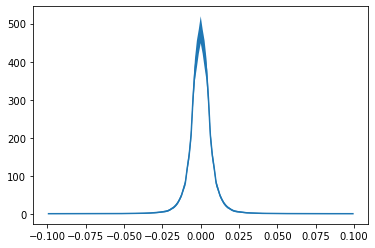

In [4]:
plotter.plot(datazps,"OtOttpFourier","A")


In [5]:
dataz1p = ConfResults(fn="../data/z1p214_N080_m-0471156_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


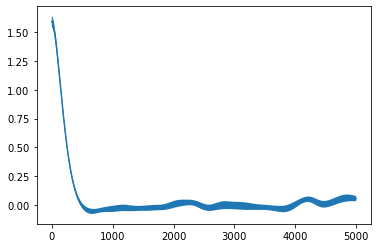

In [7]:
dataz1p.load("OtOttp","A", direc=processedDataDir)
dataz1p.load("OtOttpFourier","A", direc=processedDataDir)
plotter.plot(dataz1p,"OtOttp","A")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


(-0.01, 0.01)

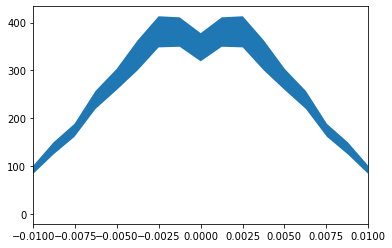

In [20]:
plotter.plot(dataz1p,"OtOttpFourier","A")
#plt.xscale('log')
plt.xlim([-0.01,0.01])